### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#ROC curve and AUC score
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
X,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y.shape

(2000,)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [8]:
#apply random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
ytrain_pred=rf_model.predict_proba(X_train)
print("RF train ROC_AUC :",roc_auc_score(y_train,ytrain_pred[:,1]))
ytest_pred=rf_model.predict_proba(X_test)
print("RF test ROC_AUC :",roc_auc_score(y_test,ytest_pred[:,1]))

RF train ROC_AUC : 1.0
RF test ROC_AUC : 0.9848666666666668


In [9]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.27, 0.73]])

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


##### No we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850444444444444


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.58,0.779443,0.490344,0.4
...,...,...,...,...
595,0.02,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.882762
1      0.115823
2      0.821283
3      0.747853
4      0.562447
         ...   
595    0.126340
596    0.115345
597    0.879197
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [16]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90424686, 0.90327475, 0.80287052,
       0.80162833, 0.79202418, 0.7905558 , 0.77380736, 0.77321156,
       0.77191919, 0.77037124, 0.74671544, 0.74637362, 0.70971721,
       0.69893711, 0.66037883, 0.65993537, 0.60896627, 0.60300386,
       0.58808969, 0.58614346, 0.58495356, 0.58236186, 0.57577749,
       0.56639283, 0.56244674, 0.55969563, 0.54542732, 0.53877948,
       0.46700602, 0.46616892, 0.46490225, 0.43222765, 0.4321034 ,
       0.38920009, 0.38879719, 0.37590767, 0.35836612, 0.23904122,
       0.23890421, 0.23467239, 0.23396893, 0.2219954 , 0.22098417,
       0.12052718, 0.1203351 , 0.10548439])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
33,0.432228,0.961667
31,0.466169,0.961667
34,0.432103,0.960000
32,0.464902,0.960000
30,0.467006,0.960000


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

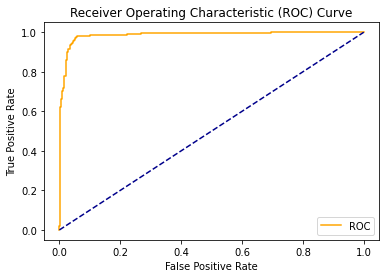

In [19]:
plot_roc_curve(fpr,tpr)